<a href="https://colab.research.google.com/github/Navya-89/Classification_ML/blob/main/Classification_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Reading the csv file 

In [ ]:
# connecting to drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/fake.csv')
df.count()

uuid                  12999
ord_in_thread         12999
author                10575
published             12999
title                 12319
text                  12953
language              12999
crawled               12999
site_url              12999
country               12823
domain_rank            8776
thread_title          12987
spam_score            12999
main_img_url           9356
replies_count         12999
participants_count    12999
likes                 12999
comments              12999
shares                12999
type                  12999
dtype: int64

In [ ]:
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [ ]:
# data description 
df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [ ]:
# Checking for null or missing values 
df.isnull().sum()

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# correlation among the predictors with target 

<ipython-input-9-dd405bfd99f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

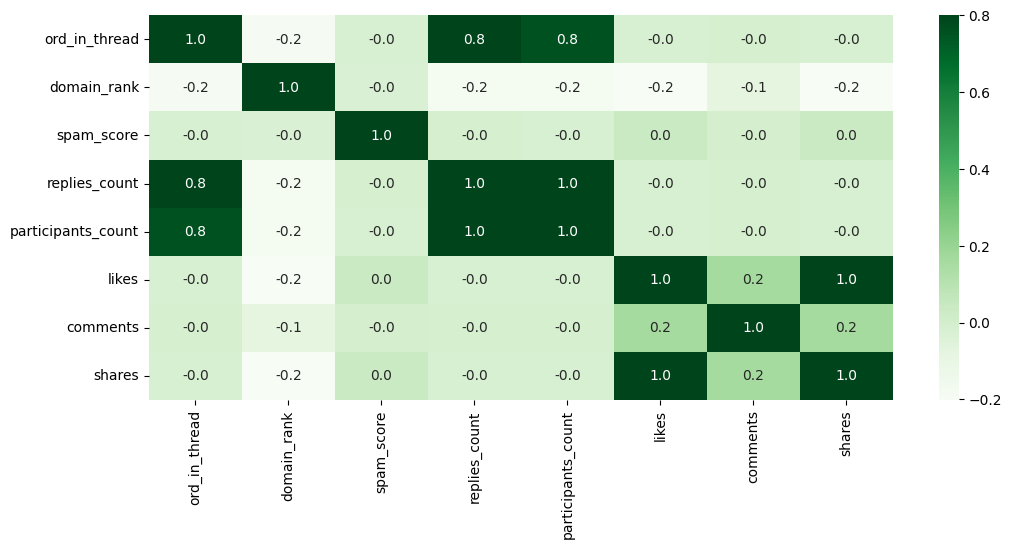

In [ ]:
# correlation among te variables 
plt.figure(figsize=(12,5))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='Greens',
    annot=True,
    fmt='.1f',
    linecolor='black',
    cbar=True)

Distribution of type of news

<Axes: xlabel='type', ylabel='count'>

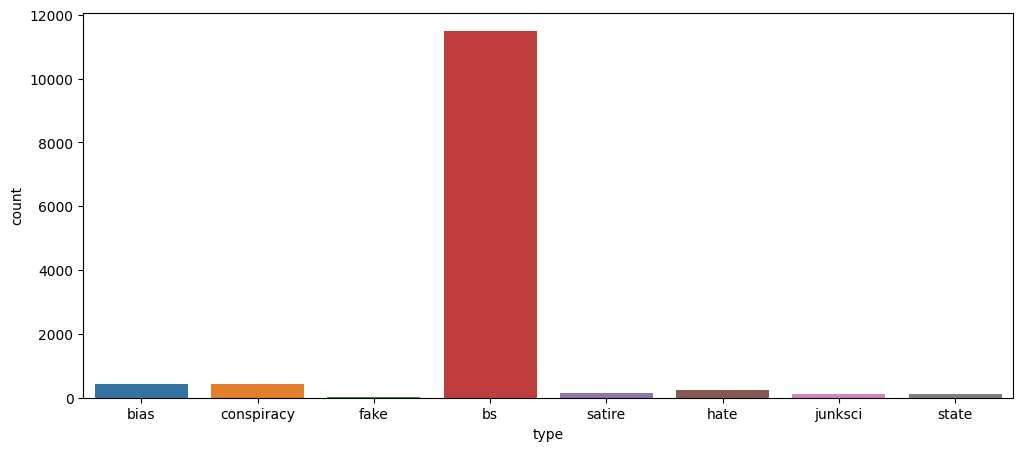

In [ ]:
## What type of news
df['type'].value_counts()
plt.figure(figsize=(12,5))
sns.countplot(x='type',data=df)

Distribution of countries from which the articles were published

<Axes: xlabel='country', ylabel='count'>

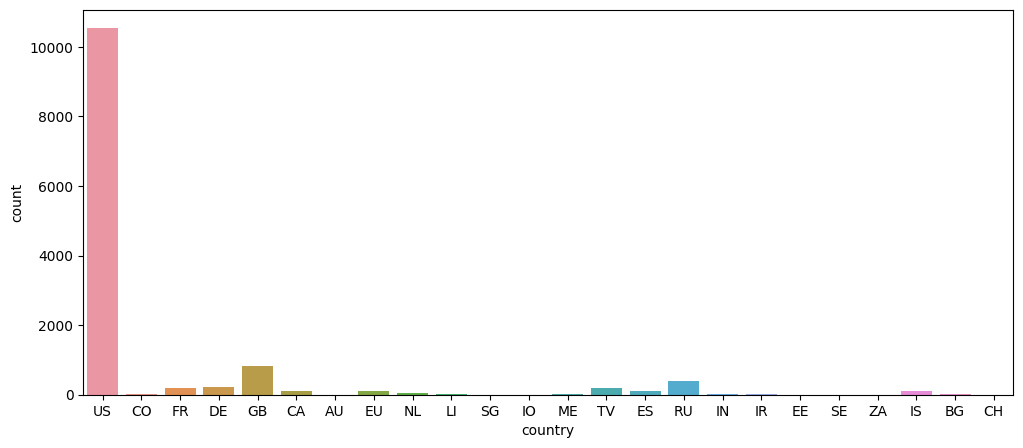

In [ ]:
# distribution of country 
df['country'].value_counts()
df['country'].fillna("US",inplace=True) # As majority are US filling the null values with it.

plt.figure(figsize=(12,5))
sns.countplot(x='country',data=df)

In [ ]:
# There is a varied distribution of countries but only few records are present for some countries 
# Hence removing the articles from countries having less than 20 records.

records_dist = df['country'].value_counts()
df.replace(records_dist[records_dist<20].index,np.nan, inplace = True)

Distribution of Primary language used in the articles 

<Axes: xlabel='language', ylabel='count'>

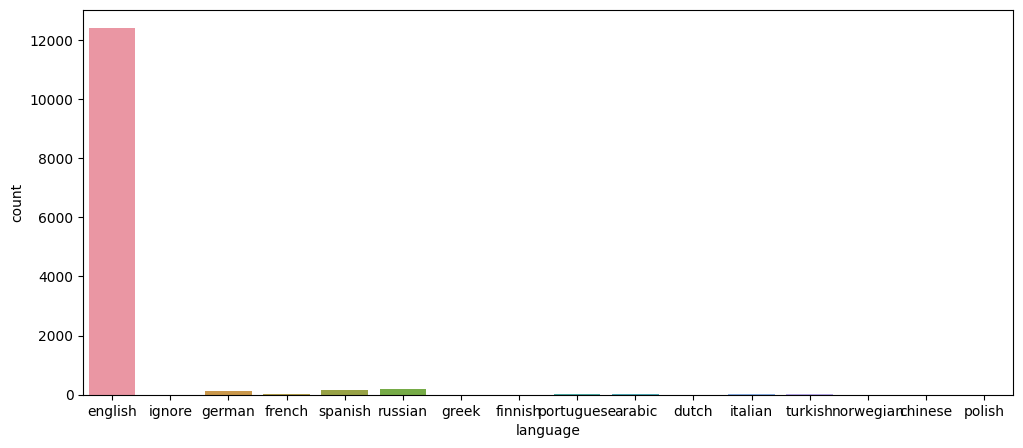

In [ ]:
# distribution of languages 
df['language'].value_counts()
plt.figure(figsize=(12,5))
sns.countplot(x='language',data=df)

In [ ]:
# Relatively the number of english articles are very large so limiting the scope.
df = df[df['language'] == 'english']

Distribution of other predictors 

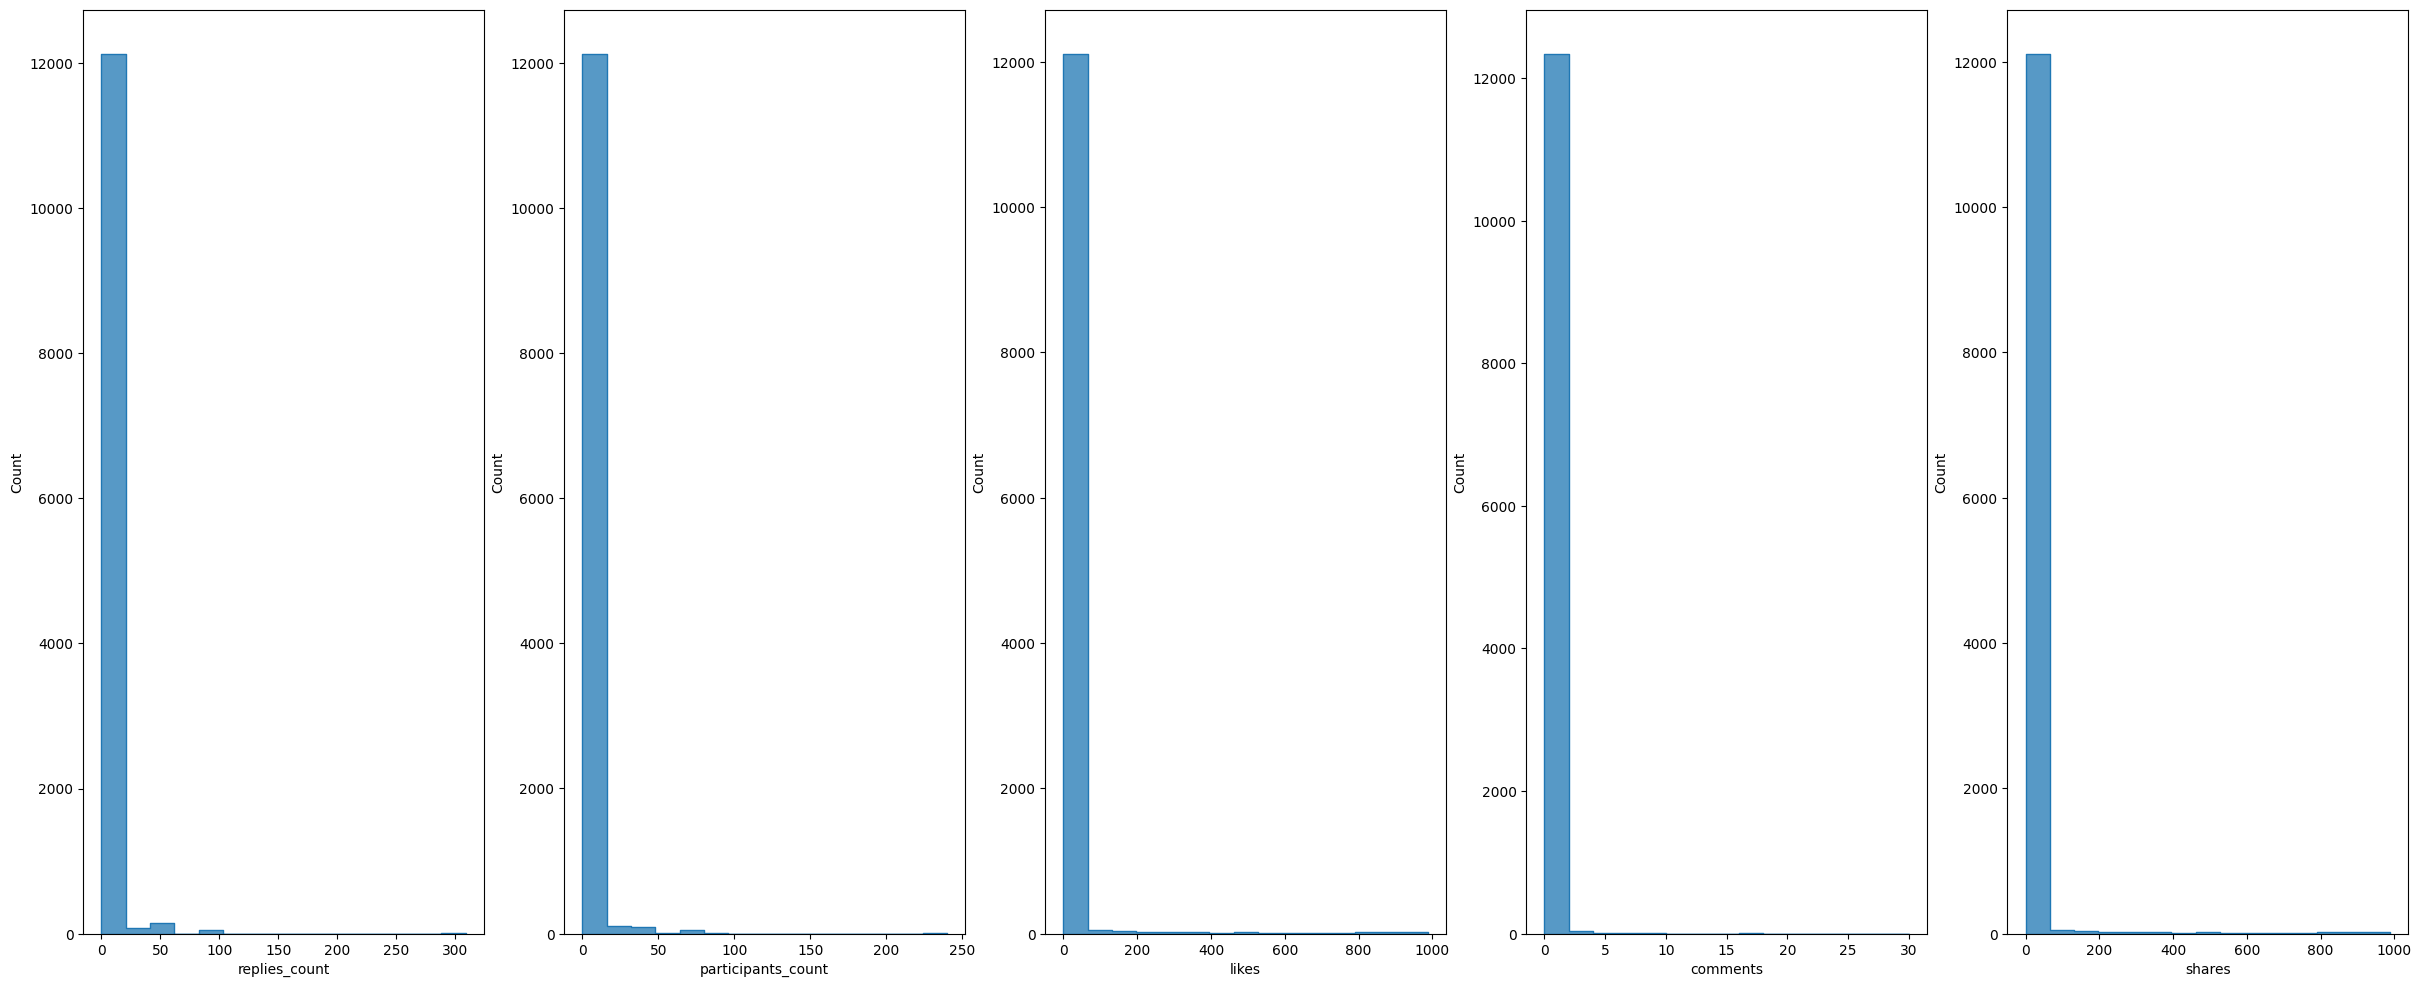

In [ ]:
# relation between the other predictors 
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(30,12))
sns.histplot(x='replies_count',data=df,element='step',ax=ax[0]);
sns.histplot(x='participants_count',data=df,element='step',ax=ax[1]);
sns.histplot(x='likes',data=df,element='step',ax=ax[2]);
sns.histplot(x='comments',data=df,element='step',ax=ax[3]);
sns.histplot(x='shares',data=df,element='step',ax=ax[4]);

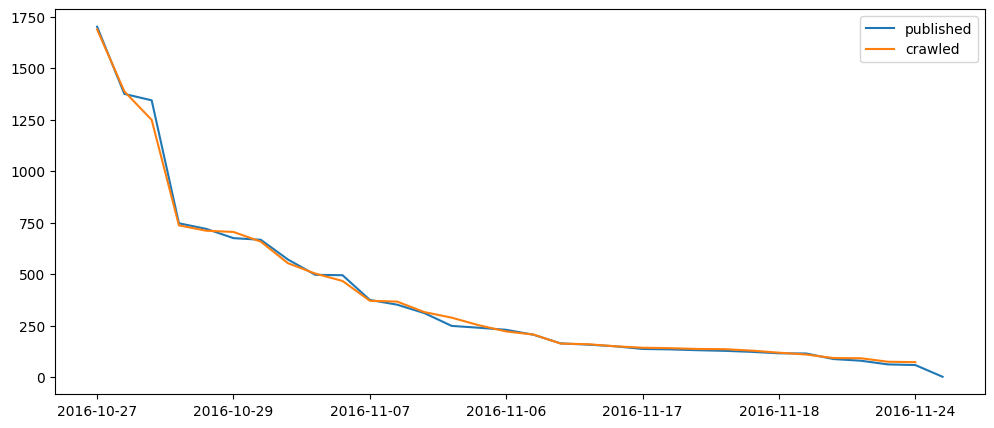

In [ ]:
# published and crawled data distribution 
df['published']=pd.to_datetime(df['published'],utc=True)
df['crawled']=pd.to_datetime(df['crawled'],utc=True)
df.insert(8,'crawled_by_day',pd.to_datetime(df['crawled'],utc=True).dt.strftime('%Y-%m-%d'))
df.insert(4,'published_by_day',pd.to_datetime(df['published'],utc=True).dt.strftime('%Y-%m-%d'))
plt.figure(figsize=(12,5))
df['published_by_day'].value_counts().plot(kind='line',label='published')
df['crawled_by_day'].value_counts().plot(kind='line',label='crawled')
plt.legend()

<ipython-input-17-a812f1fbe176>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='published_by_day',y='spam_score',data=df,ci=None)
<ipython-input-17-a812f1fbe176>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='crawled_by_day',y='spam_score',data=df,ci=None)


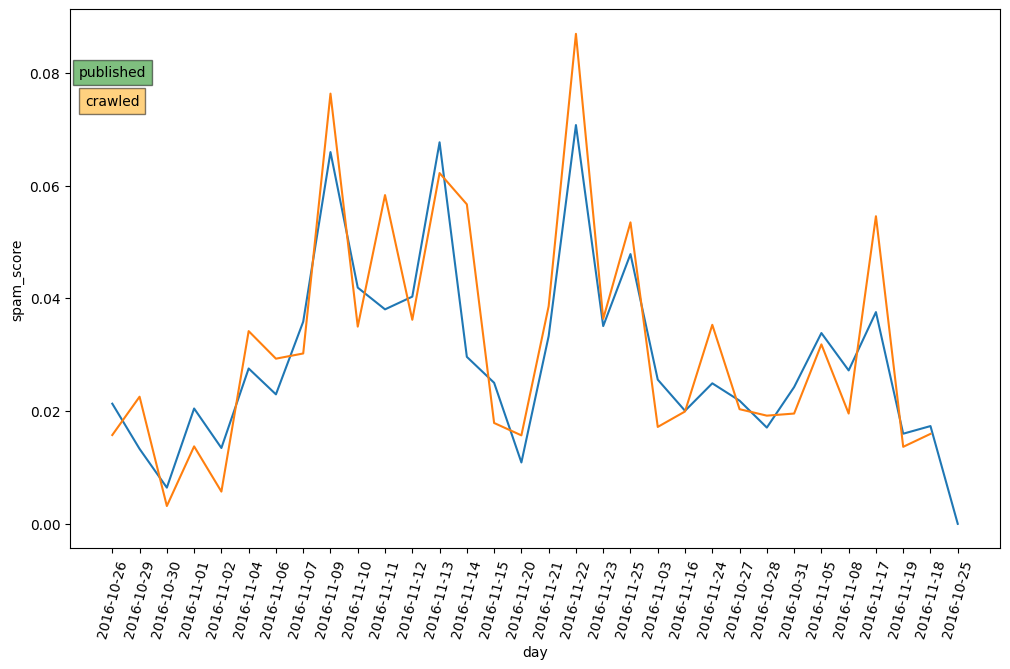

In [ ]:
# spam score distribution by published and crawled data 
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
sns.lineplot(x='published_by_day',y='spam_score',data=df,ci=None)
sns.lineplot(x='crawled_by_day',y='spam_score',data=df,ci=None)
plt.text(0,0.08,'published', horizontalalignment='center', verticalalignment='center',bbox=dict(facecolor='green', alpha=0.5))
plt.text(0,0.075,'crawled', horizontalalignment='center', verticalalignment='center',bbox=dict(facecolor='orange', alpha=0.5))
plt.xlabel('day');

# Data Labels

In [ ]:
# Giving labels to data 
df["spam_score"]=df["spam_score"]-0.5
news_type=[]
for i in df["spam_score"]:
    if(i<0):
        news_type.append("0")
    else:
        news_type.append("1")
df["news_type"]=news_type


0    12160
1      243
Name: news_type, dtype: int64


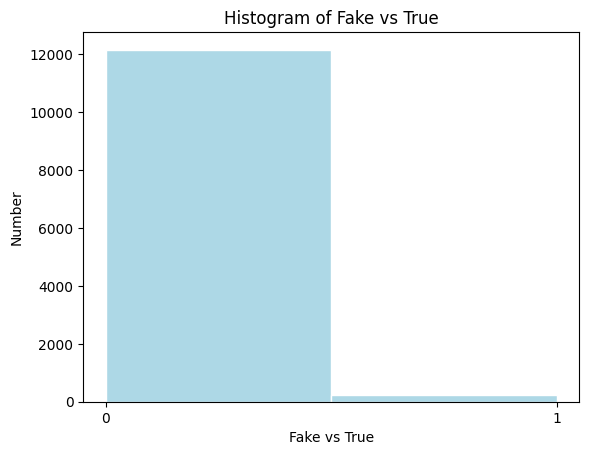

In [ ]:
# plotting the true and fake data count 
print(df['news_type'].value_counts())

plt.hist(df['news_type'], color ='lightblue', edgecolor = 'white', bins = 2)
plt.xlabel('Fake vs True')
plt.ylabel('Number')
plt.title('Histogram of Fake vs True')
plt.show()

# PCA

In [ ]:
# To create dummy variables 
df2 =pd.get_dummies(data=df,columns=["country","type"])

In [ ]:
# Retrieving useful information from the text using vectorizer
tfidf=TfidfVectorizer()
df2["title"]=tfidf.fit_transform(df["title"]).toarray()
df2["text"]=tfidf.fit_transform(df["text"]).toarray()
df2["thread_title"]=tfidf.fit_transform(df["thread_title"]).toarray()
df2["author"]=tfidf.fit_transform(df["author"]).toarray()
df2["site_url"]=tfidf.fit_transform(df["site_url"]).toarray()


In [ ]:
# target variable
Y = df2["news_type"]

In [ ]:
# predictor variables 
X = df2[['author', 'title', 'text', 'site_url', 'thread_title',
       'country_CA', 'country_DE', 'country_EU', 'country_FR',
       'country_GB', 'country_IN', 'country_IS', 'country_ME', 'country_NL',
       'country_RU', 'country_TV', 'country_US', 'type_bias', 'type_bs',
       'type_conspiracy', 'type_fake', 'type_hate', 'type_junksci',
       'type_state']]

In [ ]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components= 8)
princ_comps = pca.fit_transform(X)

print("Explained Variance: ", pca.explained_variance_)
print("Proportion Variance: ", pca.explained_variance_ratio_)
print("Cummulative proportion of variance: ",pca.explained_variance_ratio_.cumsum())


In [ ]:
## dropping unrequired columns in the analysis 

df.drop(['uuid','ord_in_thread', 'crawled', 'domain_rank', 'replies_count','participants_count', 'likes', 'comments', 'shares',
         "spam_score", 'author', 'published_by_day', 'crawled_by_day', 'country', 'thread_title'],axis=1,inplace=True)

## dropping null values 
df.dropna(axis=0,inplace=True)

# Wordcloud

In [ ]:
# Stemming 
stop_words=stopwords.words("english")
def stemmer(txt):
    txt=txt.lower()
    words=word_tokenize(txt)
    words=[w for w in words if w.isalpha()]
    words=[w for w in words if not w in stop_words]
    return( " ".join(words ))
df["title"]=df["title"].apply(stemmer)
df["text"]=df["text"].apply(stemmer)

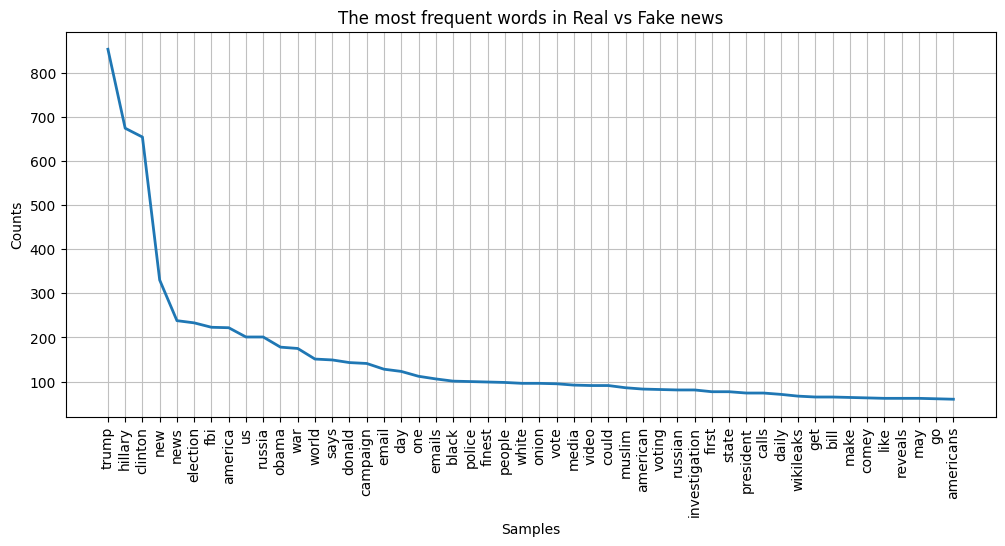

<Axes: title={'center': 'The most frequent words in Real vs Fake news'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Work tokens 
tokens = nltk.word_tokenize((''.join(df['title'])))

filtered_tokens = [t for t in tokens if t in df['title']]
freq_tokens = nltk.FreqDist(tokens)

plt.figure(figsize = (12, 5))
freq_tokens.plot(50, title = 'The most frequent words in Real vs Fake news')

(-0.5, 1599.5, 799.5, -0.5)

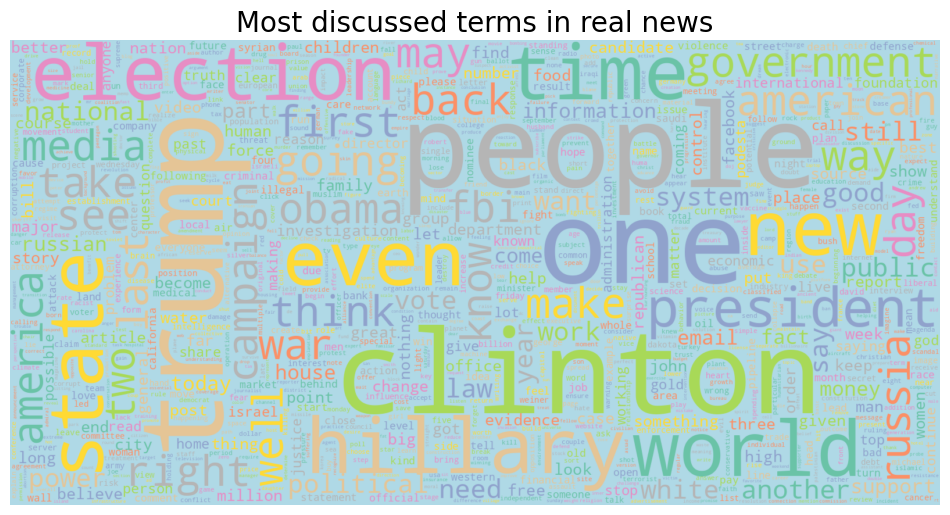

In [ ]:
# the token terms distribution in news classified as real
df_real = df.loc[df["news_type"]=='0']
tokens = nltk.word_tokenize((''.join(df_real['text'])))

filtered_tokens = [t for t in tokens if t in df_real['text']]
freq_tokens = nltk.FreqDist(tokens)

from wordcloud import WordCloud
# The wordcloud 
plt.figure(figsize = (12, 10))
wc = WordCloud(background_color = 'lightblue', colormap = 'Set2', max_words = 1000, max_font_size = 200,  width = 1600, height = 800)
wc.generate(" ".join(freq_tokens))
plt.title('Most discussed terms in real news', fontsize = 20)
plt.imshow(wc.recolor( colormap = 'Set2' , random_state = 17), alpha = 0.98, interpolation = "bilinear", )
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

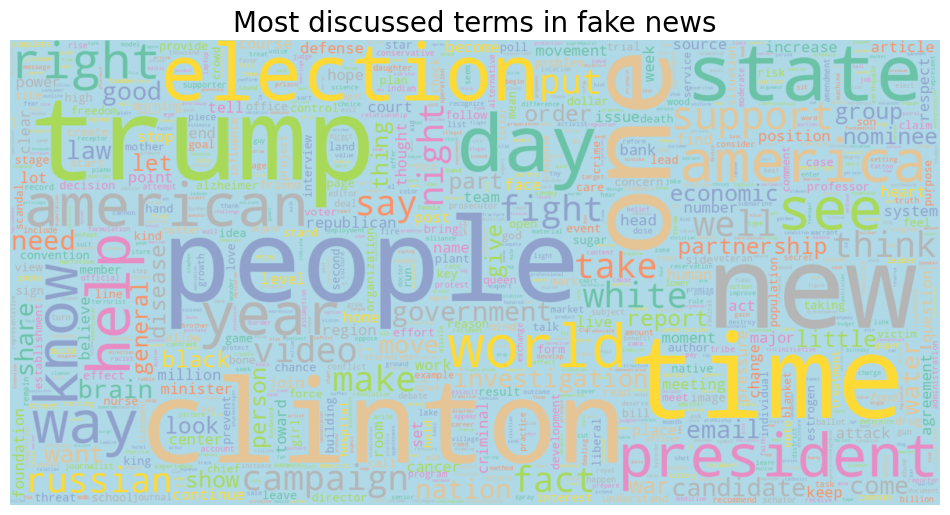

In [ ]:
# the token terms distribution in news classified as real
df_fake = df.loc[df["news_type"]=='1']
tokens = nltk.word_tokenize((''.join(df_fake['text'])))

filtered_tokens = [t for t in tokens if t in df_fake['text']]
freq_tokens = nltk.FreqDist(tokens)

from wordcloud import WordCloud
# The wordcloud 
plt.figure(figsize = (12, 10))
wc = WordCloud(background_color = 'lightblue', colormap = 'Set2', max_words = 1000, max_font_size = 200,  width = 1600, height = 800)
wc.generate(" ".join(freq_tokens))
plt.title('Most discussed terms in fake news', fontsize = 20)
plt.imshow(wc.recolor( colormap = 'Set2' , random_state = 17), alpha = 0.98, interpolation = "bilinear", )
plt.axis('off')

# Distribution of sources based on Site URL

In [ ]:
# the urls from which the news articles were sorced 
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abovetopsecret.com', 'activistpost.com', 'addictinginfo.org',
       'adobochronicles.com', 'ahtribune.com', 'americanlookout.com',
       'americannews.com', 'americasfreedomfighters.com', 'amren.com',
       'amtvmedia.com', 'anonews.co', 'anonhq.com', 'antiwar.com',
       'awdnews.com', 'barenakedislam.com', 'beforeitsnews.com',
       'bigbluevision.org', 'bignuggetnews.com', 'bipartisanreport.com',
       'blacklistednews.com', 'breitbart.com',
       'christiantimesnewspaper.com', 'chronicle.su', 'clickhole.com',
       'coasttocoastam.com', 'collective-evolution.com',
       'consciouslifenews.com', 'conservativedailypost.com',
       'conservativetribune.com', 'consortiumnews.com',
       'countercurrents.org', 'counterpunch.org', 'dailysquib.co.uk',
       'dailystormer.com', 'dailywire.com', 'davidduke.com',
       'davidstockmanscontracorner.com', 'davidwolfe.com',
       'dcclothesline.com', 'de

In [ ]:
# seperating the class types - fake and real 
df_sources = df[['site_url','news_type','main_img_url']]
val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
  val = row['site_url']
  if row['news_type'] == '0':
    val_real.append(val)
  elif row['news_type']== '1':
      val_fake.append(val)

In [ ]:
# colors for the different class types 
!pip install colorama
from colorama import Fore, Back, Style
r_ = Fore.RED
g_ = Fore.GREEN
m_ = Fore.MAGENTA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Sources publishing real news 

In [ ]:
from collections import OrderedDict 

uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 

print(f"sites publishing real news:{g_}{uniqueValues_real}\n")

sites publishing real news:['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co', 'abovetopsecret.com', 'activistpost.com', 'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com', 'americanlookout.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'anonews.co', 'anonhq.com', 'antiwar.com', 'awdnews.com', 'barenakedislam.com', 'beforeitsnews.com', 'bigbluevision.org', 'bignuggetnews.com', 'bipartisanreport.com', 'blacklistednews.com', 'breitbart.com', 'christiantimesnewspaper.com', 'chronicle.su', 'clickhole.com', 'coasttocoastam.com', 'collective-evolution.com', 'consciouslifenews.com', 'conservativedailypost.com', 'conservativetribune.com', 'consortiumnews.com', 'countercurrents.org', 'counterpunch.org', 'dailysquib.co.uk', 'dailystormer.com', 'dailywire.com', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'disclose.tv', 'donal

Sources publishing fake news 

In [ ]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
print(f"sites publishing fake news:{r_}{uniqueValues_fake}\n")

sites publishing fake news:['100percentfedup.com', '21stcenturywire.com', 'adobochronicles.com', 'ahtribune.com', 'americanlookout.com', 'anonhq.com', 'barenakedislam.com', 'beforeitsnews.com', 'bipartisanreport.com', 'clickhole.com', 'collective-evolution.com', 'consciouslifenews.com', 'counterpunch.org', 'dailystormer.com', 'dailywire.com', 'dennismichaellynch.com', 'departed.co', 'donaldtrumpnews.co', 'endingthefed.com', 'ewao.com', 'geoengineeringwatch.org', 'gomerblog.com', 'govtslaves.info', 'guardianlv.com', 'ijr.com', 'journal-neo.org', 'magafeed.com', 'miniplanet.us', 'morningnewsusa.com', 'nakedcapitalism.com', 'newstarget.com', 'newsthump.com', 'nutritionfacts.org', 'occupydemocrats.com', 'off-guardian.org', 'opednews.com', 'presstv.ir', 'rbth.com', 'redflagnews.com', 'sgtreport.com', 'spinzon.com', 'theantimedia.org', 'thedailymash.co.uk', 'theduran.com', 'theearthchild.co.za', 'thefederalistpapers.org', 'thelastlineofdefense.org', 'theonion.com', 'therussophile.org', 'trut

Sources publishing both real and fake news 

In [ ]:

real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 

print(f"sites publishing both real and fake news:{m_}{real_set & fake_set}\n")

sites publishing both real and fake news:{'usuncut.com', '21stcenturywire.com', 'beforeitsnews.com', 'theantimedia.org', 'presstv.ir', 'undergroundhealth.com', 'govtslaves.info', 'opednews.com', 'dailywire.com', 'anonhq.com', 'rbth.com', 'redflagnews.com', 'off-guardian.org', 'geoengineeringwatch.org', 'newstarget.com', 'thefederalistpapers.org', 'nutritionfacts.org', 'bipartisanreport.com', 'twitchy.com', 'ewao.com', 'endingthefed.com', 'consciouslifenews.com', 'unz.com', 'ahtribune.com', 'newsthump.com', 'barenakedislam.com', 'guardianlv.com', 'gomerblog.com', 'donaldtrumpnews.co', 'sgtreport.com', 'spinzon.com', 'dennismichaellynch.com', 'americanlookout.com', 'theonion.com', 'usatwentyfour.com', 'collective-evolution.com', 'journal-neo.org', 'dailystormer.com', 'clickhole.com', 'occupydemocrats.com', 'counterpunch.org', 'magafeed.com', '100percentfedup.com', 'theearthchild.co.za', 'adobochronicles.com', 'thelastlineofdefense.org', 'ijr.com', 'theduran.com', 'therussophile.org', 'tr

Distribution of sources on type of news

In [ ]:
# the type of news coded ordinally 
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [ ]:
# segregating the type of data by its labels 
df_type = df[['site_url','type']]

val_bias=[]
val_conspiracy=[]
val_fake1=[]
val_bs=[]
val_satire=[]
val_hate=[]
val_junksci=[]
val_state=[]
{'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
for i,row in df_type.iterrows():
    val = row['site_url']
    if row['type'] == 0:
        val_bias.append(val)
    elif row['type']== 1:
        val_conspiracy.append(val)
    elif row['type']== 2:
        val_fake1.append(val)
    elif row['type']== 3:
        val_bs.append(val)
    elif row['type']== 4:
        val_satire.append(val)
    elif row['type']== 5:
        val_hate.append(val)
    elif row['type']== 6:
        val_junksci.append(val)
    elif row['type']== 7:
        val_state.append(val)
  

In [ ]:
# source urls segregated by the class type 
uv_bias = list(OrderedDict.fromkeys(val_bias)) 
uv_conspiracy = list(OrderedDict.fromkeys(val_conspiracy)) 
uv_fake = list(OrderedDict.fromkeys(val_fake1)) 
uv_bs = list(OrderedDict.fromkeys(val_bs)) 
uv_satire = list(OrderedDict.fromkeys(val_satire)) 
uv_hate = list(OrderedDict.fromkeys(val_hate)) 
uv_junksci = list(OrderedDict.fromkeys(val_junksci)) 
uv_state = list(OrderedDict.fromkeys(val_state)) 

#print(f"{type1}\n")
i=0
for lst in (uv_bias,uv_conspiracy,uv_fake,uv_bs,uv_satire, uv_hate,uv_junksci,uv_state): 
    print(f"Source URLs for type:{i}{lst}\n") 
    i+=1

Source URLs for type:0['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'politicususa.com', 'projectveritas.com', 'redstatewatcher.com', 'westernjournalism.com', 'wnd.com']

Source URLs for type:1['21stcenturywire.com', 'activistpost.com', 'awdnews.com', 'globalresearch.ca', 'infowars.com', 'newstarget.com', 'prisonplanet.com']

Source URLs for type:2['abcnews.com.co', 'adobochronicles.com', 'thelastlineofdefense.org']

Source URLs for type:3['abovetopsecret.com', 'ahtribune.com', 'americanlookout.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'anonews.co', 'anonhq.com', 'antiwar.com', 'barenakedislam.com', 'beforeitsnews.com', 'bigbluevision.org', 'bignuggetnews.com', 'bipartisanreport.com', 'blacklistednews.com', 'breitbart.com', 'christiantimesnewspaper.com', 'chronicle.su', 'coasttocoastam.com', 'collective-evolution.com', 'consciouslifenews.com', 'conservativedailypost.com', 'conservativetribune.com', 'consortiumnews.com', 'count

# Fitting and validating the ML classification models 

In [ ]:
# extracting sample from dataframe 
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,news_type
11005,2016-11-02 22:29:25.095000+00:00,trunews jim rickards spook etat deep state civ...,trunews jim rickards spook etat deep state civ...,english,trunews.com,http://static.trunews.com/images/Show-11.02_.1...,3,0
12828,2016-10-28 10:07:00+00:00,goldman sachs america must elect hillary clinton,posted october baxter dmitry news us comments ...,english,yournewswire.com,http://cdns.yournewswire.com/wp-content/upload...,3,0
9706,2016-10-29 14:03:43.097000+00:00,christian pastor jailed iran reveals stunning ...,home us christian pastor jailed iran reveals s...,english,thefederalistpapers.org,http://thefederalistpapers.integratedmarket.ne...,3,0
8394,2016-11-01 09:27:56.644000+00:00,syrian girl mysteriously photo video,citizen journalism punch syrian girl mysteriou...,english,russia-insider.com,http://russia-insider.com/sites/insider/files/...,3,0
1986,2016-10-28 09:09:06.276000+00:00,lucifer banker bradley birkenfeld corporate cr...,email bradley birkenfeld held book launch part...,english,counterpunch.org,http://www.counterpunch.org/wp-content/dropzon...,3,0


In [ ]:
# dividing the data into target labels and predictor labels 
y = df1.type

x = df1.loc[:,['site_url','text']]
x['source'] = x["site_url"].astype(str) +" "+ x["text"] 
x = x.drop(['site_url','text'],axis=1)
x = x.source

After preprocessing, the output is a corpus of raw texts that are stripped of stopwords, stemmed and lemmatized.

In order to get a sparse matrix of TF/IDF values, the following steps are taken:

Tokenization of texts
Counting of the tokens and
Transforming the raw tokens into TF/IDF values
The above steps are done with the help of the TfidfVectorizer, which transforms text to feature vectors that can be used as input to estimators/classifiers.

In [ ]:
#splitting the data into train and test 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

# converting the dataset into tfidf vectors 
tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names_out())

In [ ]:
# Shape of the training and testing data 
tfidf_train.shape, tfidf_test.shape, y_train.shape, y_test.shape

((5800, 61227), (2486, 61227), (5800,), (2486,))

Logistic Regression 

In [ ]:
# running the Logistic Regression model 
LR=LogisticRegression()
LR.fit(tfidf_train,y_train)
ypred = LR.predict(tfidf_test)
LRscore = accuracy_score(y_test,ypred)
print("accuracy:  %0.3f" %LRscore)

accuracy:  0.868


In [ ]:
# precision, recall and f1 score 
p = precision_recall_fscore_support(y_test, ypred, average='macro')
print("\nPrecision:  %0.3f" %p[0],"\nRecall:  %0.3f" %p[1], "\nF1score:  %0.3f\n" %p[2] )


Precision:  0.483 
Recall:  0.149 
F1score:  0.161



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# classification report
target = ['bias', 'conspiracy','fake','bs','satire', 'hate','junksci', 'state']
print(classification_report(y_test, ypred, target_names= target))

              precision    recall  f1-score   support

        bias       1.00      0.10      0.18       104
  conspiracy       1.00      0.07      0.13        84
        fake       0.00      0.00      0.00         7
          bs       0.87      1.00      0.93      2141
      satire       0.00      0.00      0.00        34
        hate       1.00      0.03      0.05        40
     junksci       0.00      0.00      0.00        34
       state       0.00      0.00      0.00        42

    accuracy                           0.87      2486
   macro avg       0.48      0.15      0.16      2486
weighted avg       0.84      0.87      0.81      2486



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [ ]:
# fitting the data for Random Forest model 
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.943


In [ ]:
p1 = precision_recall_fscore_support(y_test, y_pred1, average='macro')
print("\nPrecision:  %0.3f" %p1[0],"\nRecall:  %0.3f" %p1[1], "\nF1score:  %0.3f\n" %p1[2] )


Precision:  0.982 
Recall:  0.647 
F1score:  0.740



In [ ]:
print(classification_report(y_test, y_pred1, target_names= target))

              precision    recall  f1-score   support

        bias       0.99      0.65      0.79       104
  conspiracy       0.93      0.51      0.66        84
        fake       1.00      0.71      0.83         7
          bs       0.94      1.00      0.97      2141
      satire       1.00      0.15      0.26        34
        hate       1.00      0.82      0.90        40
     junksci       1.00      0.35      0.52        34
       state       1.00      0.98      0.99        42

    accuracy                           0.94      2486
   macro avg       0.98      0.65      0.74      2486
weighted avg       0.94      0.94      0.93      2486



Decision Tree

In [ ]:
# fitting the data to decision tree model 
svc = DecisionTreeClassifier().fit(tfidf_train,y_train)
y_pred2 = svc.predict(tfidf_test)
DTscore = accuracy_score(y_test,y_pred2)
print("accuracy:  %0.3f" %DTscore)

accuracy:  0.989


In [ ]:
p2 = precision_recall_fscore_support(y_test, y_pred2, average='macro')
print("\nPrecision:  %0.3f" %p2[0],"\nRecall:  %0.3f" %p2[1], "\nF1score:  %0.3f\n" %p2[2] )


Precision:  0.973 
Recall:  0.981 
F1score:  0.977



In [ ]:
print(classification_report(y_test, y_pred2, target_names= target))

              precision    recall  f1-score   support

        bias       0.95      0.94      0.95       104
  conspiracy       0.89      0.94      0.91        84
        fake       1.00      1.00      1.00         7
          bs       0.99      0.99      0.99      2141
      satire       1.00      1.00      1.00        34
        hate       1.00      1.00      1.00        40
     junksci       0.97      0.97      0.97        34
       state       0.98      1.00      0.99        42

    accuracy                           0.99      2486
   macro avg       0.97      0.98      0.98      2486
weighted avg       0.99      0.99      0.99      2486



SVM

In [ ]:
# Fitting the data to SVM
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(tfidf_train,y_train)
y_pred3 = classifier.predict(tfidf_test)
SVscore = accuracy_score(y_test,y_pred3)
print("accuracy:  %0.3f" %SVscore)

accuracy:  0.900


In [ ]:
p3 = precision_recall_fscore_support(y_test, y_pred3, average='macro')
print("\nPrecision:  %0.3f" %p3[0],"\nRecall:  %0.3f" %p3[1], "\nF1score:  %0.3f\n" %p3[2] )


Precision:  0.835 
Recall:  0.342 
F1score:  0.434



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred3, target_names= target))

              precision    recall  f1-score   support

        bias       0.94      0.32      0.47       104
  conspiracy       1.00      0.33      0.50        84
        fake       1.00      0.14      0.25         7
          bs       0.90      1.00      0.94      2141
      satire       1.00      0.15      0.26        34
        hate       0.88      0.17      0.29        40
     junksci       0.00      0.00      0.00        34
       state       0.96      0.62      0.75        42

    accuracy                           0.90      2486
   macro avg       0.83      0.34      0.43      2486
weighted avg       0.89      0.90      0.87      2486



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparision

In [ ]:
# comparing the ML models performance metrics 
result = pd.DataFrame({'Models': ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree'],'Accuracy': [LRscore,SVscore,RFscore,DTscore],
                       'Precision': [p[0],p1[0],p2[0],p3[0]], 'Sensitivity': [p[1],p1[1],p2[1],p3[1]], 'F1score': [p[2],p1[2],p2[2],p3[2]] })

In [ ]:
result

,Models,Accuracy,Precision,Sensitivity,F1score
0,Logistic Regression,0.882140,0.489944,0.500000,0.494921
1,SVM,0.910298,0.994218,0.712007,0.817294
2,Random Forest,0.957763,0.986130,0.984900,0.985377
3,Decision Tree,0.993966,0.763505,0.357831,0.446141
